In [222]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib import colors
# import numpy as np
import grape
from scipy.signal import filtfilt, butter
from scipy.stats import pearsonr



In [110]:
# Load in dataset from csv
df = pd.read_csv('DATA/filtered_dtec.csv', header=None)

colnames = ['doy', 'lat', 'lon', 'dtec']
df.columns = colnames

print(df.head())


     doy      lat       lon    dtec
0  181.0  40.3043 -118.5940  0.0236
1  181.0  40.9166 -122.5876 -0.0119
2  181.0  40.0408  -75.9074  0.0586
3  181.0  41.7403 -121.1315 -0.0705
4  181.0  40.4477 -120.3947 -0.0038


In [111]:
# Establish midpoint coordinates
mpt = (41.751, -89.617)

In [112]:
# Filter by Latitude 
width = 0.2
lb = mpt[0] - width/2
ub = mpt[0] + width/2

df_filt_lat = df[df['lat'] > lb]
df_filt_lat = df_filt_lat[df_filt_lat['lat'] < ub]

print(df.shape)
print(df_filt_lat.shape)

(10939763, 4)
(1058201, 4)


In [113]:
# Filter by Longitude
width = 0.2
lb = mpt[1] - width/2
ub = mpt[1] + width/2

df_filt_lon = df_filt_lat[df_filt_lat['lon'] > lb]
df_filt_lon = df_filt_lon[df_filt_lon['lon'] < ub]

print(df_filt_lat.shape)
print(df_filt_lon.shape)

(1058201, 4)
(2597, 4)


In [ ]:
# Filter by dTEC
width = 0.04
lb = - width/2
ub = width/2

df_filter_dTEC = df_filt_lon
df_filter_dTEC = df_filt_lon[df_filt_lon['dtec'] > lb]
df_filter_dTEC = df_filter_dTEC[df_filter_dTEC['dtec'] < ub]

print(df_filter_dTEC.shape)
print(df_filter_dTEC.head())

(708, 4)
             doy      lat      lon    dtec
156712  181.0149  41.7268 -89.6533 -0.0018
161937  181.0153  41.7344 -89.6363 -0.0144
181246  181.0170  41.8377 -89.6453 -0.0127
183928  181.0174  41.8136 -89.6455 -0.0176
184869  181.0174  41.8372 -89.6282 -0.0052


In [203]:
# Apply Butterworth Filter
FILTERORDER = 3
# FILTERBREAK = 0.005
FILTERBREAK = 0.1

b, a = butter(FILTERORDER, FILTERBREAK, analog=False, btype='low')

dtec_filt = filtfilt(b, a, df_filter_dTEC['dtec'])
df_filter_dTEC['dtec_filt'] = dtec_filt

print(df_filter_dTEC.head())

             doy      lat      lon    dtec  dtec_filt
156712  181.0149  41.7268 -89.6533 -0.0018  -0.002458
161937  181.0153  41.7344 -89.6363 -0.0144  -0.004394
181246  181.0170  41.8377 -89.6453 -0.0127  -0.006195
183928  181.0174  41.8136 -89.6455 -0.0176  -0.007752
184869  181.0174  41.8372 -89.6282 -0.0052  -0.008976


In [204]:
# Reset the index for the filtered df for indexing
filt_df = df_filter_dTEC.reset_index(drop=True)
datapoints = filt_df.shape[0]

print(filt_df.head())

        doy      lat      lon    dtec  dtec_filt
0  181.0149  41.7268 -89.6533 -0.0018  -0.002458
1  181.0153  41.7344 -89.6363 -0.0144  -0.004394
2  181.0170  41.8377 -89.6453 -0.0127  -0.006195
3  181.0174  41.8136 -89.6455 -0.0176  -0.007752
4  181.0174  41.8372 -89.6282 -0.0052  -0.008976


In [205]:
# Calculate time from DOY in UT
daynum = int(filt_df['doy'][0])
filt_df['ut'] = (filt_df['doy'] - daynum) * 24

print(filt_df.head())

        doy      lat      lon    dtec  dtec_filt      ut
0  181.0149  41.7268 -89.6533 -0.0018  -0.002458  0.3576
1  181.0153  41.7344 -89.6363 -0.0144  -0.004394  0.3672
2  181.0170  41.8377 -89.6453 -0.0127  -0.006195  0.4080
3  181.0174  41.8136 -89.6455 -0.0176  -0.007752  0.4176
4  181.0174  41.8372 -89.6282 -0.0052  -0.008976  0.4176


In [206]:
kwargs = {
    # Grape Parameters
    'mbl' : 5,

    # Plot Parameters
    'val': 'freq',          # Value to plot
    'local': False,         # Toggle local time on x-axis
    'ylim': [-1.25, 1.25],  # Y-axis limits
    'save': False,          # Toggle save figure  

    # What Plots
    'dop': True,            # Plot Doppler Shift
    'sza': True,            # Plot Solar Zenith Angle
    'pwr': False,            # Plot Power

    'SPO' : False,          # Toggle vertical lines for sunrise, sunset, and solar noon
    'end_times': True,      # Toggle RX and TX times for SPO
    'axis2': 'pwr',         # Secondary axis
}

g = grape.grapeLoad(2021, 7, 1, **kwargs)
print(g.date)

c:\Users\sabas\anaconda\envs\wwv\lib\site-packages\suncalc\suncalc.py:202: RuntimeWarning: invalid value encountered in arccos
  return acos((sin(h) - sin(phi) * sin(d)) / (cos(phi) * cos(d)))
c:\Users\sabas\anaconda\envs\wwv\lib\site-packages\pandas\core\tools\datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


2021-07-01


c:\Users\sabas\anaconda\envs\wwv\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


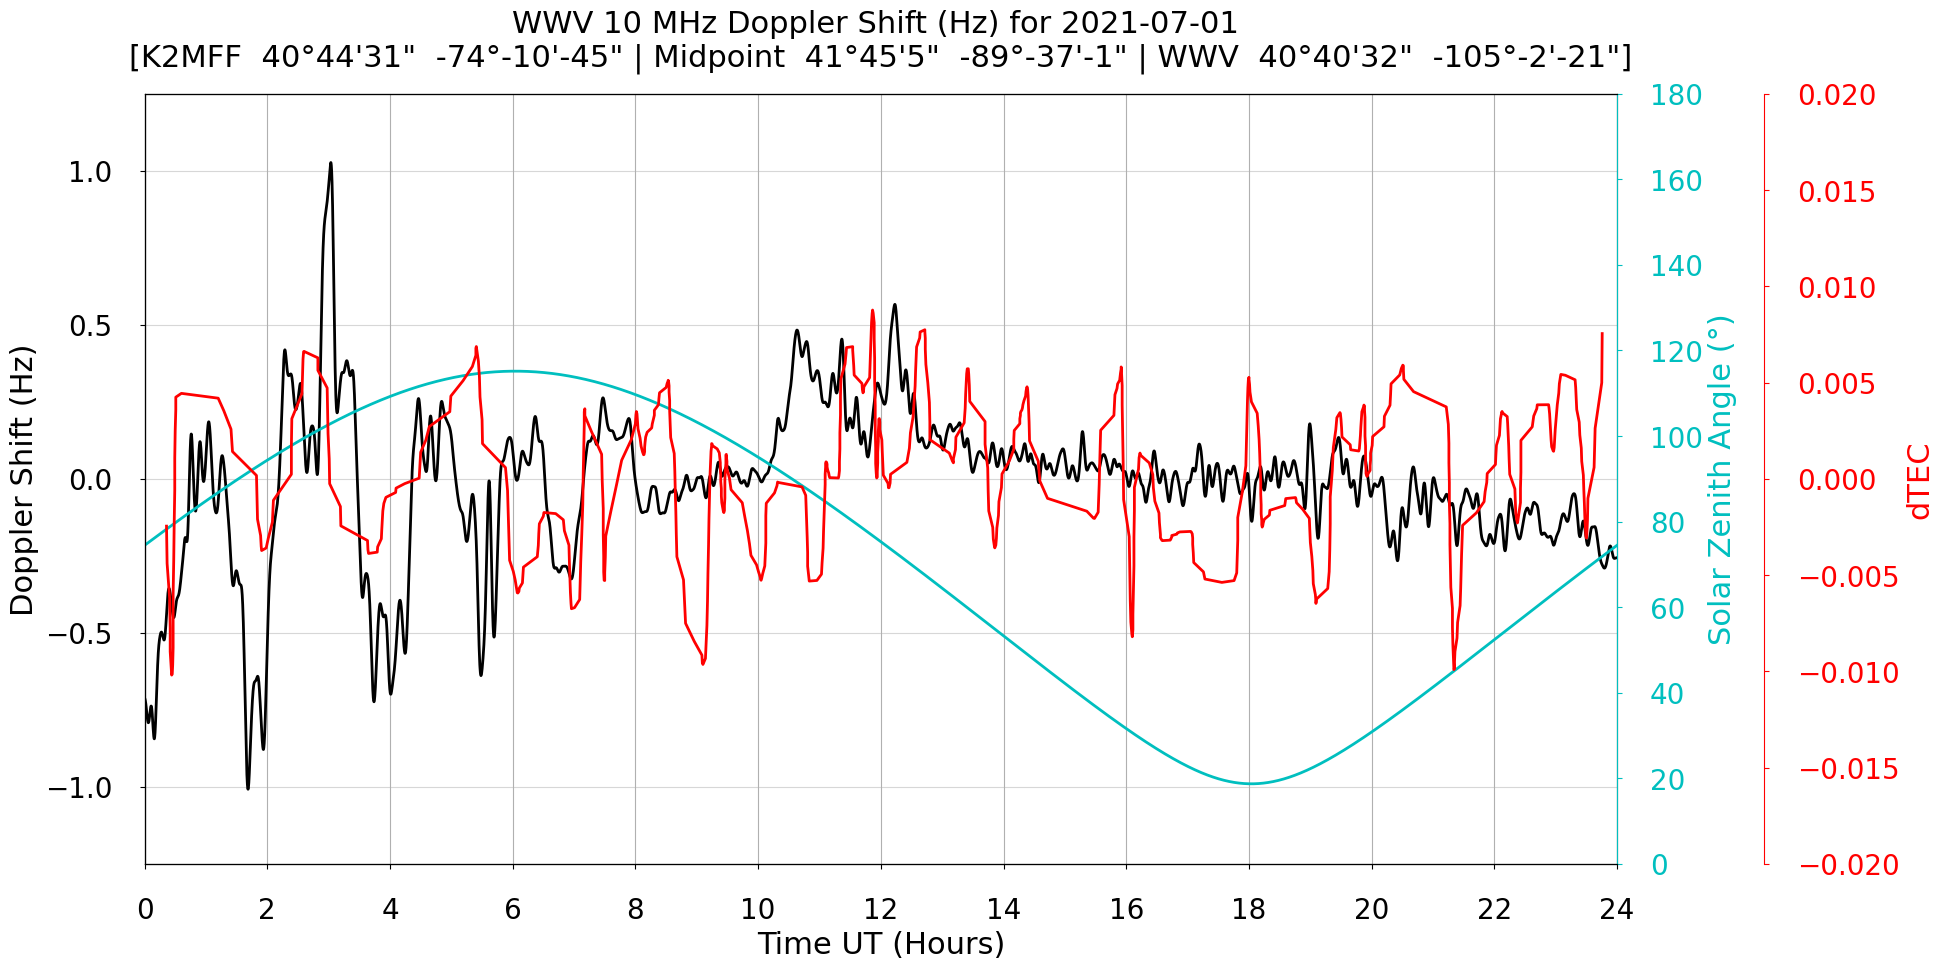

In [ ]:
# Plot the data
figname = grape.figname(**kwargs)
ax1 = g.dopPowPlot(figname, **kwargs)

x = filt_df['ut']
y = filt_df['dtec_filt']

alt_color = 'r'
fSize = g.plot_settings['fontsize']
labelpad = g.plot_settings['pad']

ax2 = ax1.twinx()
ax2.plot(x, y, alt_color, linewidth=2)

ax2.set_ylabel('dTEC', color=alt_color, fontsize=fSize)
ax2.set_ylim([-0.02, 0.02])

ax2.tick_params(axis='y', colors=alt_color, labelsize=fSize-2, direction='out', pad=labelpad)
ax2.spines['right'].set_color(alt_color)
additional_padding = 1 + 0.05 * 2
ax2.spines['right'].set_position(('axes', additional_padding))

plt.show()


In [209]:
g_df = pd.DataFrame({
    'dshift': g.freq_filt - 10e6,
    'ut': g.t_range
})

print(g_df.head())

     dshift        ut
0 -0.711571  0.000000
1 -0.711671  0.000278
2 -0.711775  0.000556
3 -0.711883  0.000833
4 -0.711995  0.001111


In [ ]:
g_df['dtec'] = [0] * len(g_df['ut'])
for i, t in enumerate(g_df['ut']):
    index = abs(filt_df['ut'] - t).idxmin()
    g_df['dtec'][i] = filt_df['dtec_filt'][index]

print(g_df.head())

C:\Users\sabas\AppData\Local\Temp\ipykernel_24324\3414481954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_df['dtec'][i] = filt_df['dtec_filt'][index]


     dshift        ut      dtec
0 -0.711571  0.000000 -0.002458
1 -0.711671  0.000278 -0.002458
2 -0.711775  0.000556 -0.002458
3 -0.711883  0.000833 -0.002458
4 -0.711995  0.001111 -0.002458


In [ ]:
correlation_matrix = g_df[['dshift', 'dtec']].corr()

correlation_coefficient = correlation_matrix.loc['dshift', 'dtec']

print(f"Correlation coefficient: {correlation_coefficient}")


Correlation coefficient: 0.10054429797149525


In [229]:
df_slice = g_df[0:10000]

correlation_matrix = df_slice[['dshift', 'dtec']].corr()

correlation_coefficient = correlation_matrix.loc['dshift', 'dtec']

print(g_df.size)
print(f"Correlation coefficient: {correlation_coefficient}")


253122
Correlation coefficient: 0.6087399416211301


In [223]:
correlation_coefficient, p_value = pearsonr(g_df['dshift'], g_df['dtec'])

print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.10054429797149392
P-value: 1.9148133204289764e-188
